In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

In [ ]:
import pyssht as ssht

In [ ]:
from eb_functions import tqu2qeueqbub, sYlm, glm, g, getYlms, ssht_to_healpix

In [ ]:
res = getYlms(80, 8)
x = g(1, 100, 8, 16, 80, res[0], res[1])

In [291]:
gp = g(1, 2000, lmax=8, nside=16, L=80, Ylms=res[0], mYlms=res[1])

In [292]:
gm = g(-1, 2000, lmax=8, nside=16, L=80, Ylms=res[0], mYlms=res[1])

In [293]:
gp_map = ssht_to_healpix(np.real(gp), L=80, nside=16)
gm_map = ssht_to_healpix(np.imag(gm), L=80, nside=16)

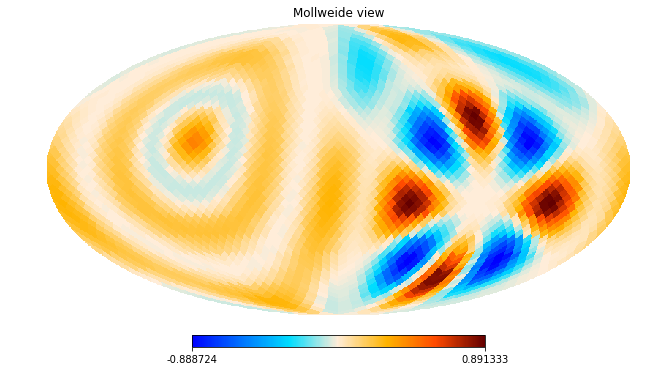

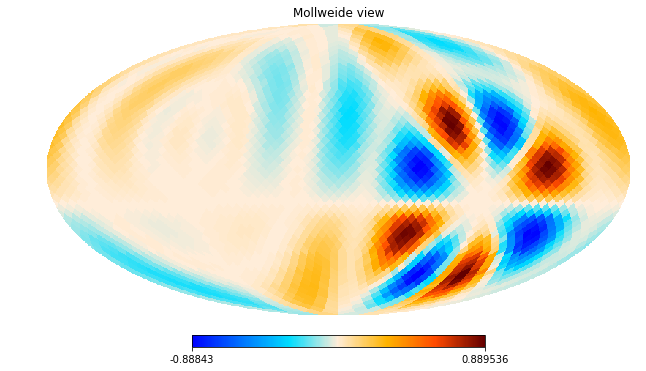

In [294]:
hp.mollview(gp_map, cmap=cmap)
hp.mollview(-1*gm_map, cmap=cmap)

In [295]:
gps = []
gms = []
for i in range(hp.nside2npix(16)):
    gps.append(g(1, i, lmax=8, nside=16, L=80, Ylms=res[0], mYlms=res[1], verbose=False))
    gms.append(g(-1, i, lmax=8, nside=16, L=80, Ylms=res[0], mYlms=res[1], verbose=False))
    print "%d/%d\r" % (i+1, hp.nside2npix(16)),

In [304]:
gp_matrix = []
gm_matrix = []
for i in range(hp.nside2npix(16)):
    gp_matrix.append(ssht_to_healpix(np.real(gps[i]), L=80, nside=16))
    gm_matrix.append(ssht_to_healpix(np.imag(gms[i]), L=80, nside=16))
    print "%d/%d\r" % (i+1, hp.nside2npix(16)),

In [305]:
QE_estimated = [0.5 * Q[i] + (np.sum(gp_matrix[i] * Q) + np.sum(gm_matrix[i] * U)) * 4*np.pi / len(gp_map) for i in range(3072)]

In [335]:
UE_estimated = [0.5 * U[i] + (np.sum(gm_matrix[i] * Q) - np.sum(gp_matrix[i] * U)) * 4*np.pi / len(gp_map) for i in range(3072)]

In [338]:
QB_estimated = [0.5 * Q[i] - (np.sum(gp_matrix[i] * Q) + np.sum(gm_matrix[i] * U)) * 4*np.pi / len(gp_map) for i in range(3072)]

In [340]:
UB_estimated = [0.5 * U[i] - (np.sum(gm_matrix[i] * Q) - np.sum(gp_matrix[i] * U)) * 4*np.pi / len(gp_map) for i in range(3072)]

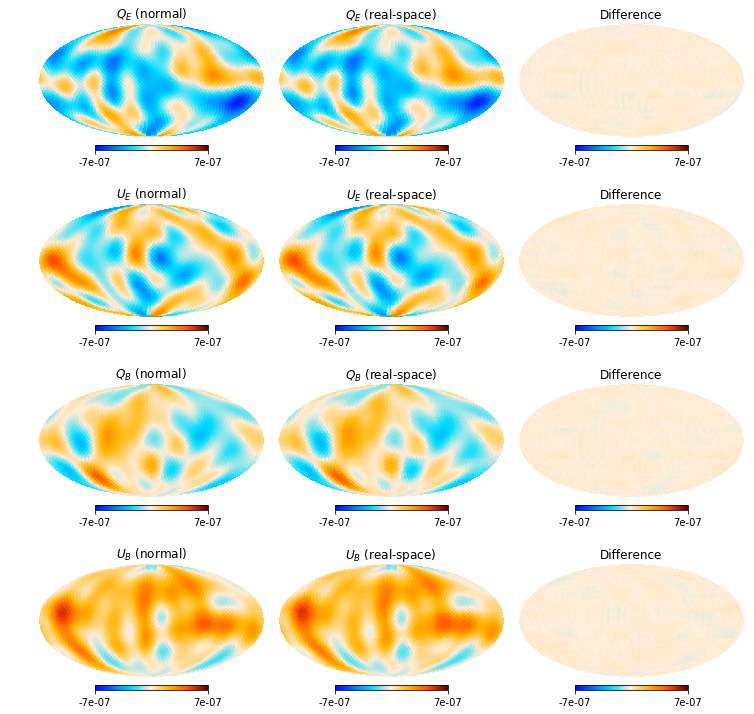

In [352]:
plt.figure(figsize=(10, 10))

hp.mollview(QE_true, cmap=cmap, min=-7e-7, max=7e-7, fig=1, sub=(4,3,1))
plt.title(r'$Q_E$ (normal)')
hp.mollview(np.array(QE_estimated), cmap=cmap, min=-7e-7, max=7e-7, fig=1, sub=(4,3,2))
plt.title(r'$Q_E$ (real-space)')
hp.mollview(QE_true - np.array(QE_estimated), cmap=cmap, min=-7e-7, max=7e-7, fig=1, sub=(4,3,3))
plt.title('Difference')

hp.mollview(UE_true, cmap=cmap, min=-7e-7, max=7e-7, fig=1, sub=(4,3,4))
plt.title(r'$U_E$ (normal)')
hp.mollview(np.array(UE_estimated), cmap=cmap, min=-7e-7, max=7e-7, fig=1, sub=(4,3,5))
plt.title(r'$U_E$ (real-space)')
hp.mollview(UE_true - np.array(UE_estimated), cmap=cmap, min=-7e-7, max=7e-7, fig=1, sub=(4,3,6))
plt.title('Difference')

hp.mollview(QB_true, cmap=cmap, min=-7e-7, max=7e-7, fig=1, sub=(4,3,7))
plt.title(r'$Q_B$ (normal)')
hp.mollview(np.array(QB_estimated), cmap=cmap, min=-7e-7, max=7e-7, fig=1, sub=(4,3,8))
plt.title(r'$Q_B$ (real-space)')
hp.mollview(QB_true - np.array(QB_estimated), cmap=cmap, min=-7e-7, max=7e-7, fig=1, sub=(4,3,9))
plt.title('Difference')

hp.mollview(UB_true, cmap=cmap, min=-7e-7, max=7e-7, fig=1, sub=(4,3,10))
plt.title(r'$U_B$ (normal)')
hp.mollview(np.array(UB_estimated), cmap=cmap, min=-7e-7, max=7e-7, fig=1, sub=(4,3,11))
plt.title(r'$U_B$ (real-space)')
hp.mollview(UB_true - np.array(UB_estimated), cmap=cmap, min=-7e-7, max=7e-7, fig=1, sub=(4,3,12))
plt.title('Difference')

plt.savefig('lmax8nside16.pdf', bbox_inches='tight')

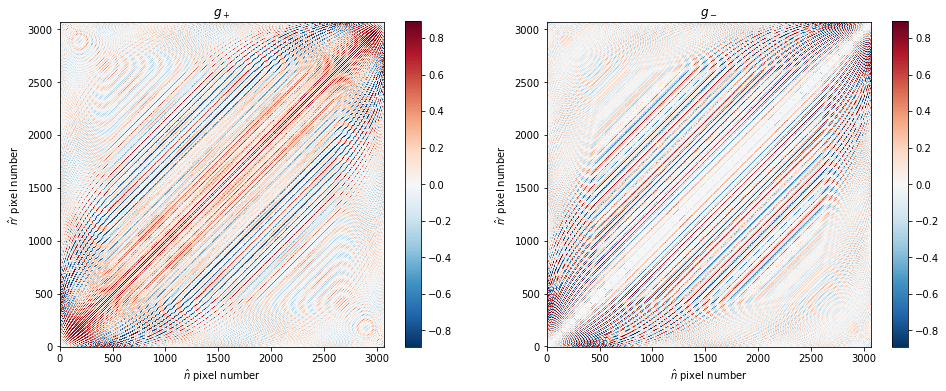

In [378]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(gp_matrix, origin='lower', cmap='RdBu_r')
plt.colorbar()
plt.title(r'$g_+$')
plt.xlabel(r"$\hat{n}$ pixel number")
plt.ylabel(r"$\hat{n}'$ pixel number")

plt.subplot(1,2,2)
plt.imshow(gm_matrix, origin='lower', cmap='RdBu_r')
plt.colorbar()
plt.title(r'$g_-$')
plt.xlabel(r"$\hat{n}$ pixel number")
plt.ylabel(r"$\hat{n}'$ pixel number")
plt.savefig('matrix-plots.pdf', bbox_inches='tight')

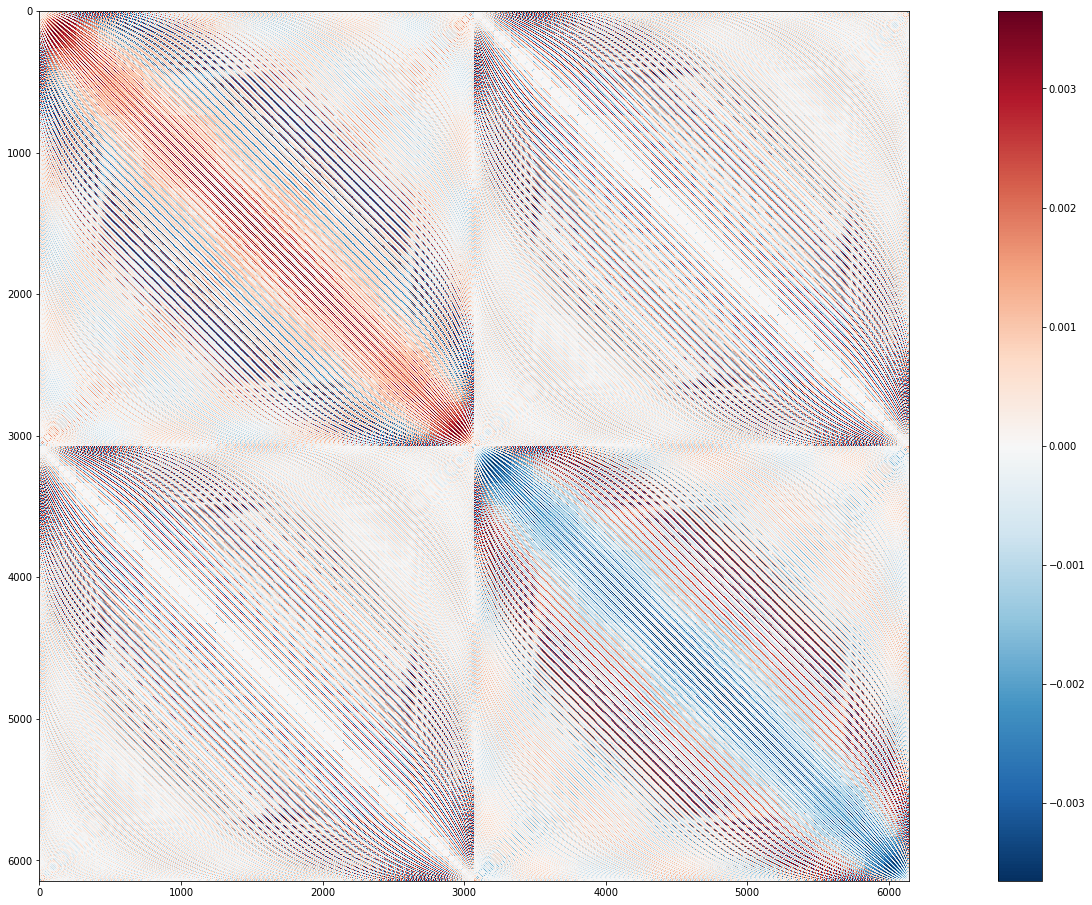

In [15]:
plt.figure(figsize=(32,16))
plt.imshow(G, cmap='RdBu_r')
plt.colorbar()
plt.savefig('G.pdf', bbox_inches='tight')

In [17]:
M = np.identity(len(P))
for i in range(len(P)):
    if mask[i % hp.nside2npix(16)] == 0:
        M[i,i] = 0

In [18]:
commutator = np.dot(M, G) - np.dot(G, M)

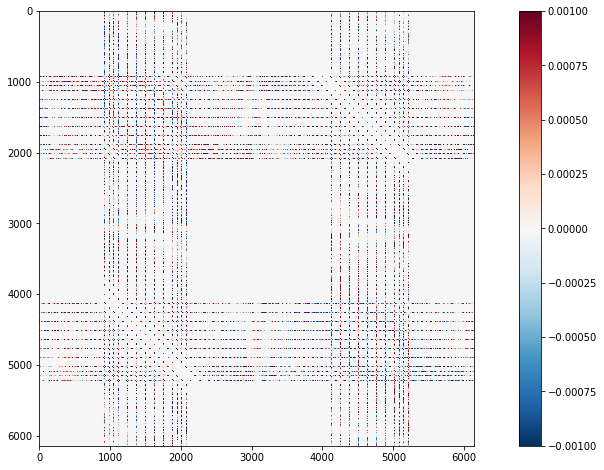

In [19]:
plt.figure(figsize=(16,8))
plt.imshow(commutator, cmap='RdBu_r', vmin=-0.001, vmax=0.001)
plt.colorbar()
plt.savefig('commutator2.pdf', bbox_inches='tight')

In [22]:
GEM = np.dot(GE, M)

In [23]:
MGEM = np.dot(M, GEM)

In [24]:
tpl = 2*np.dot(GB, MGEM)

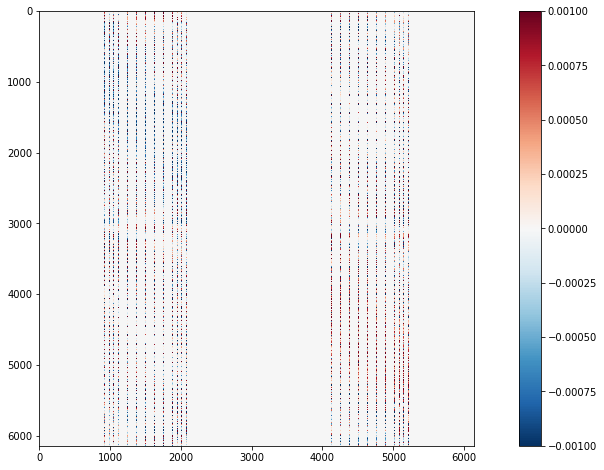

In [25]:
plt.figure(figsize=(16,8))
plt.imshow(tpl, cmap='RdBu_r', vmin=-0.001, vmax=0.001)
plt.colorbar()
plt.savefig('template.pdf', bbox_inches='tight')

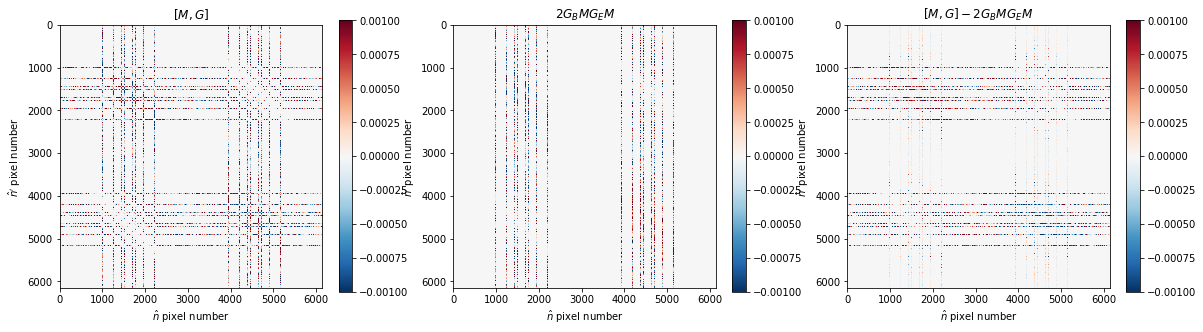

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(commutator, cmap='RdBu_r', vmin=-0.001, vmax=0.001)
plt.colorbar()
plt.title(r'$[M, G]$')
plt.xlabel(r"$\hat{n}$ pixel number")
plt.ylabel(r"$\hat{n}'$ pixel number")

plt.subplot(1,3,2)
plt.imshow(tpl, cmap='RdBu_r', vmin=-0.001, vmax=0.001)
plt.colorbar()
plt.title(r'$2G_B M G_E M$')
plt.xlabel(r"$\hat{n}$ pixel number")
plt.ylabel(r"$\hat{n}'$ pixel number")
plt.savefig('tpl-commutator.pdf', bbox_inches='tight')

plt.subplot(1,3,3)
plt.imshow(commutator - tpl, cmap='RdBu_r', vmin=-0.001, vmax=0.001)
plt.colorbar()
plt.title(r'$[M, G] - 2G_B M G_E M$')
plt.xlabel(r"$\hat{n}$ pixel number")
plt.ylabel(r"$\hat{n}'$ pixel number")
plt.savefig('tpl-commutator.pdf', bbox_inches='tight')